# **Image Transformation**

## **1. Importing Libraries**

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## **2. Loading The Image**

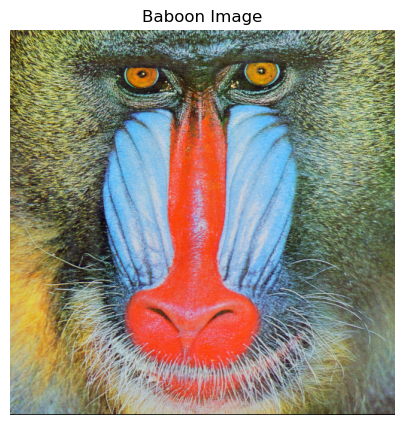

In [ ]:
# Loading the image in BGR format using OpenCV.
baboon_image_bgr =cv2.imread("C:/Users/bbuser/Desktop/baboon.png")

# Converting BGR to RGB for correct color display in matplotlib.
baboon_image_rgb = cv2.cvtColor(baboon_image_bgr, cv2.COLOR_BGR2RGB)

# Displaying the image.
plt.figure(figsize=(5, 5)) # Set figure size.
plt.imshow(baboon_image_rgb) # Showing RGB image.
plt.title("Baboon Image")  # Adding a title.
plt.axis("off")  # Hiding the axes.
plt.show()  # Displaying the image.

## **3. Creating and Displaying Histograms**

### **Red**

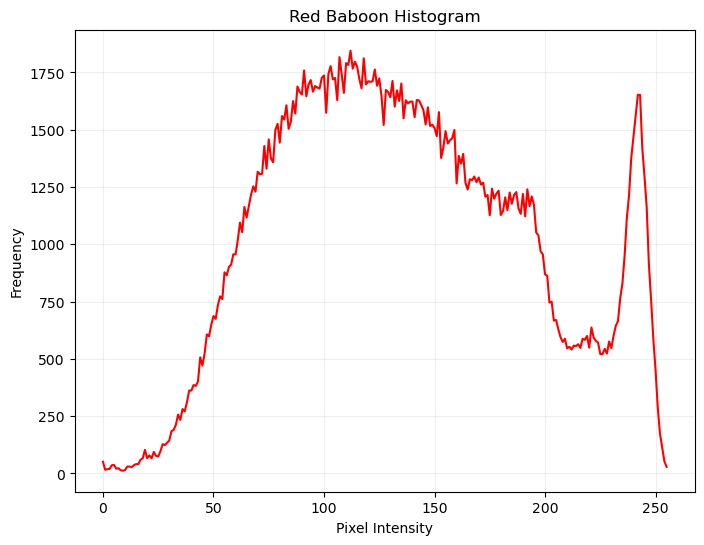

In [ ]:
# Histogram for Red Channel.

plt.figure(figsize=(8,6)) # To specify the size of the image.
red_baboon_hist = cv2.calcHist([baboon_image_rgb], [0], None, [256], [0, 256]) # Calculate histogram for red channel
plt.plot(red_baboon_hist, color="red") # Ploting in red
plt.title("Red Baboon Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.show()

### **Green**

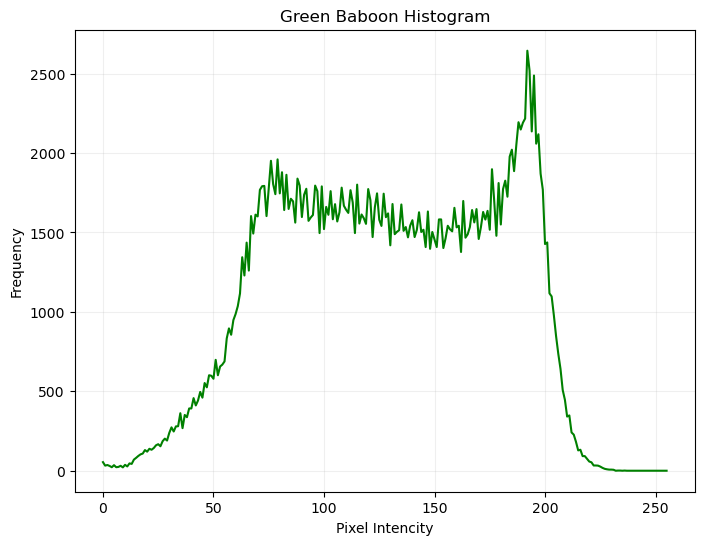

In [ ]:
# Histogram for Green Channel.

plt.figure(figsize=(8,6))
green_baboon_hist = cv2.calcHist([baboon_image_rgb], [1], None, [256], [0,256]) # Calculate histogram for green channel
plt.plot(green_baboon_hist, color="green") # Ploting in green
plt.title("Green Baboon Histogram")
plt.xlabel("Pixel Intencity")
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.show()

### **Blue**

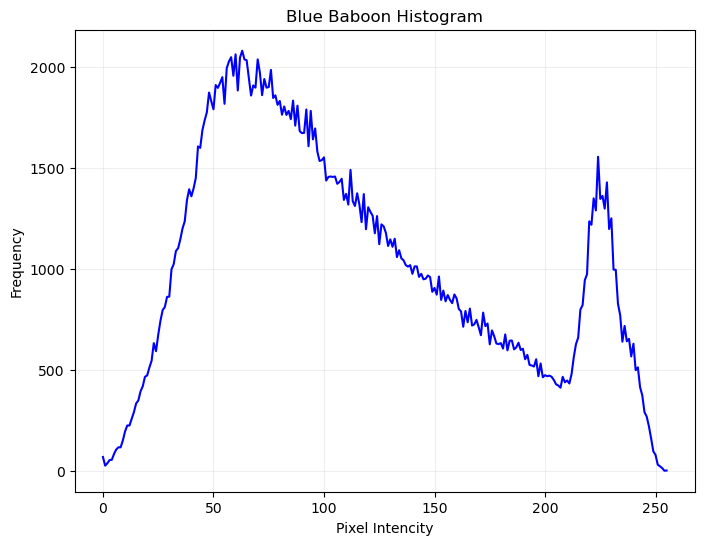

In [ ]:
# Histogram for Blue Channel.

plt.figure(figsize=(8,6))
blue_baboon_hist = cv2.calcHist([baboon_image_rgb], [2], None, [256], [0,256]) # Calculate histogram for blue channel
plt.plot(blue_baboon_hist, color="blue") # Ploting in blue
plt.title("Blue Baboon Histogram")
plt.xlabel("Pixel Intencity")
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.show()

## **4. Apply Intensity Transformations**

### **A. Negative Image**

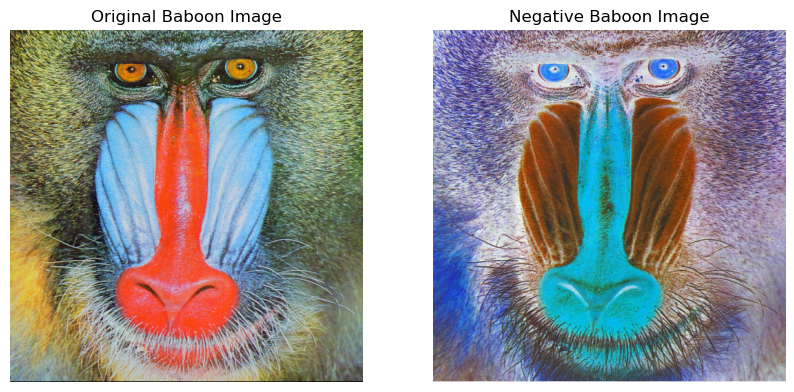

In [ ]:
# Invert pixel values (creates photo negative)
negative_baboon_image = 255 - baboon_image_rgb

# Show original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(baboon_image_rgb)
plt.title("Original Baboon Image")
plt.axis('off')

# Show negative image
plt.subplot(1, 2, 2)
plt.imshow(negative_baboon_image)
plt.title("Negative Baboon Image")
plt.axis('off')
plt.show()

### **B. Brightness & Contrast**

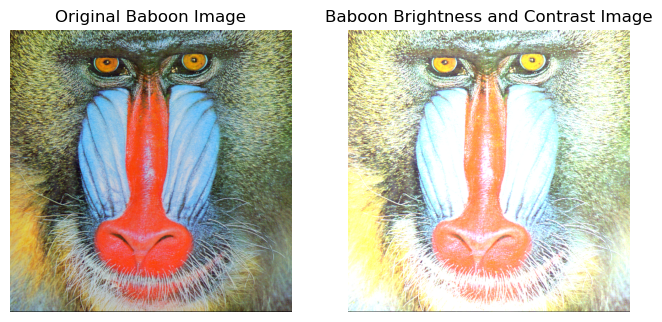

In [ ]:
alpha = 1.5  # Contrast control (1.0 = no change)
beta = 50    # Brightness control (0 = no change)

# Apply transformation using OpenCV (scales, clips, and converts image)
baboon_bright_contrast_image = cv2.convertScaleAbs(baboon_image_rgb, alpha=alpha, beta=beta)

# Show before and after adjustments
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(baboon_image_rgb)
plt.title("Original Baboon Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(baboon_bright_contrast_image)
plt.title("Baboon Brightness and Contrast Image")
plt.axis('off')
plt.show()

## **5. Histogram Equalization**

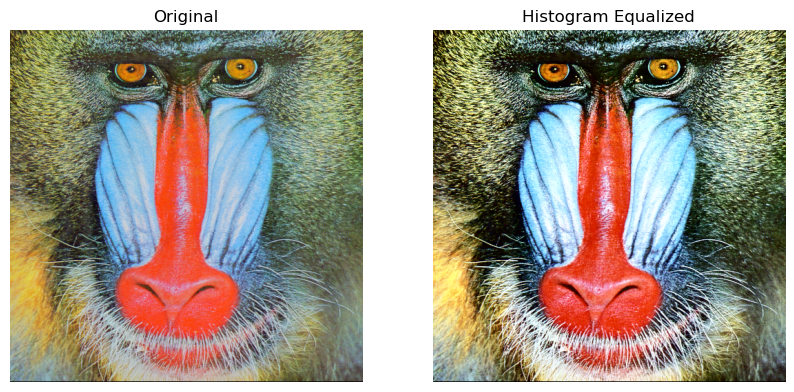

In [ ]:
# Convert RGB image to YCrCb (luma + color difference channels)
baboon_image_ycrcb = cv2.cvtColor(baboon_image_rgb, cv2.COLOR_RGB2YCrCb)

# Split channels: Y = brightness (luma), Cr & Cb = color
y, cr, cb = cv2.split(baboon_image_ycrcb)

# Equalize only the Y channel (brightness)
y_eq = cv2.equalizeHist(y)

# Merge the modified Y back with original Cr and Cb
baboon_image_ycrcb_eq = cv2.merge((y_eq, cr, cb))

# Convert back to RGB to display result
baboon_image_eq = cv2.cvtColor(baboon_image_ycrcb_eq, cv2.COLOR_YCrCb2RGB)

# Show the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(baboon_image_rgb)
plt.title("Original")
plt.axis('off')

# show the equalized image
plt.subplot(1, 2, 2)
plt.imshow(baboon_image_eq)
plt.title("Histogram Equalized")
plt.axis('off')
plt.show()

## **6. Convert The Image to Grayscale**

C:\Users\bbuser\AppData\Local\Temp\ipykernel_10804\3717488654.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_baboon_image.ravel(), 256, [0, 256], color='gray') # Flatten image to 1D for histogram


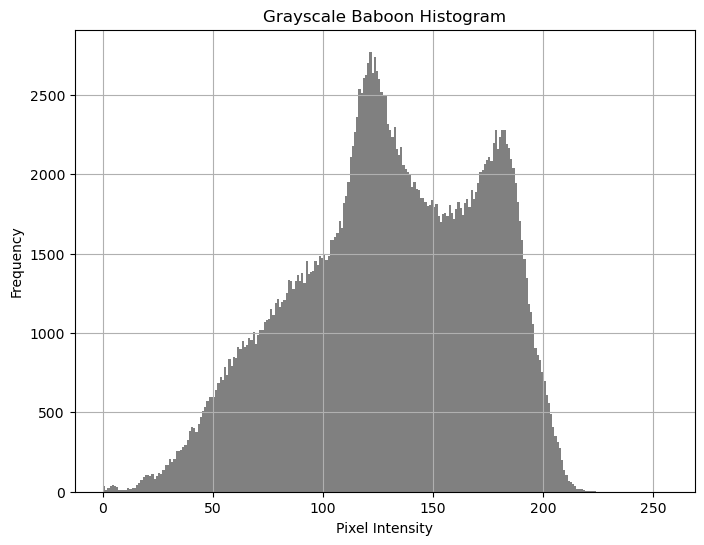

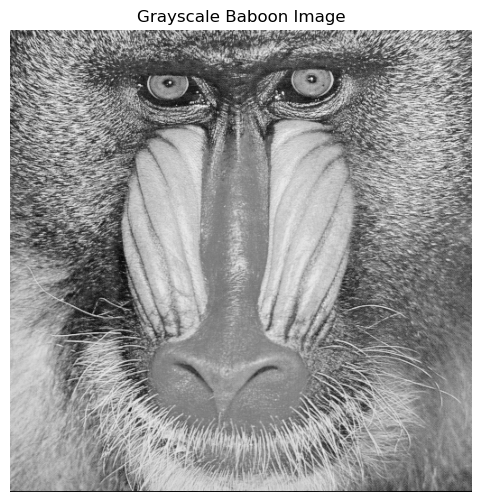

In [ ]:
# Convert RGB to Grayscale
gray_baboon_image = cv2.cvtColor(baboon_image_rgb, cv2.COLOR_RGB2GRAY)

# Plot histogram of grayscale image
plt.figure(figsize=(8, 6))
plt.hist(gray_baboon_image.ravel(), 256, [0, 256], color='gray') # Flatten image to 1D for histogram
plt.title("Grayscale Baboon Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Display grayscale image
plt.figure(figsize=(6,6))
plt.imshow(gray_baboon_image, cmap='gray') # cmap='gray' ensures grayscale display
plt.title("Grayscale Baboon Image")
plt.axis('off')
plt.show()

## **7. Apply Otsu’s Thresholding**

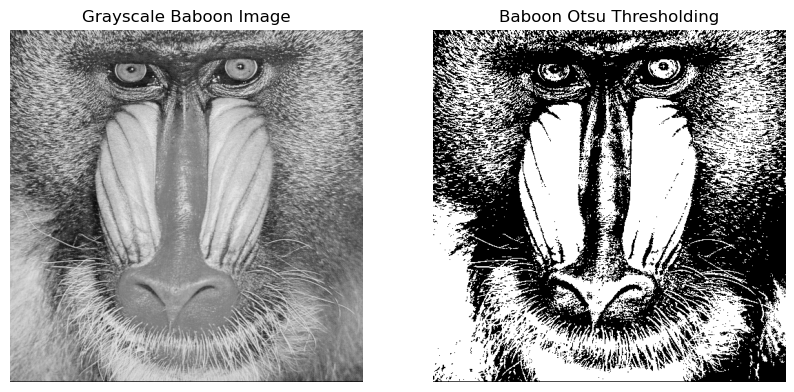

In [ ]:
# Apply Otsu's automatic thresholding
_, baboon_otsu_image = cv2.threshold(gray_baboon_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show original grayscale image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_baboon_image, cmap='gray')
plt.title("Grayscale Baboon Image")
plt.axis('off')

# show the thresholded image
plt.subplot(1, 2, 2)
plt.imshow(baboon_otsu_image, cmap='gray')
plt.title("Baboon Otsu Thresholding")
plt.axis('off')
plt.show()